In [33]:
import random
import numpy as np
from sklearn.datasets import make_classification

In [34]:
# load dataset
def data_generate():
    x_train, y_train = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=0)
    x_test, y_test = make_classification(n_samples=10, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=1)
    return x_train, y_train, x_test, y_test

# 100 training examples and 10 test examples
x_train, y_train, x_test, y_test = data_generate()

In [35]:
x_train

array([[-7.66054695e-01,  1.83324682e-01],
       [-9.20383253e-01, -7.23168038e-02],
       [-9.86585088e-01, -2.86920000e-01],
       [ 1.70910242e+00, -1.10453952e+00],
       [ 1.98764670e+00,  1.77624479e+00],
       [ 3.86274219e+00,  2.63325914e+00],
       [-1.12836011e+00, -4.22761581e-01],
       [-1.10074198e+00, -2.56042975e+00],
       [-1.53716448e+00,  1.10502647e+00],
       [-3.23726922e-01,  5.56269743e-01],
       [-1.28532883e+00, -1.30819171e+00],
       [ 3.35973253e+00, -1.79506345e+00],
       [-1.27034986e+00,  1.26780440e+00],
       [-7.10233633e-01, -1.13058206e+00],
       [-1.12933108e+00,  6.87661760e-01],
       [ 2.48206729e-01, -5.09792713e-01],
       [-2.47263494e+00, -4.86612462e-01],
       [-1.11573423e+00,  1.43370121e+00],
       [-1.21414740e+00,  1.97698901e+00],
       [-1.25860859e+00, -1.82896522e-01],
       [-5.35834091e-01,  1.10698637e+00],
       [ 9.23281451e-01, -1.30813451e+00],
       [ 2.02751248e+00, -4.03257104e-01],
       [ 2.

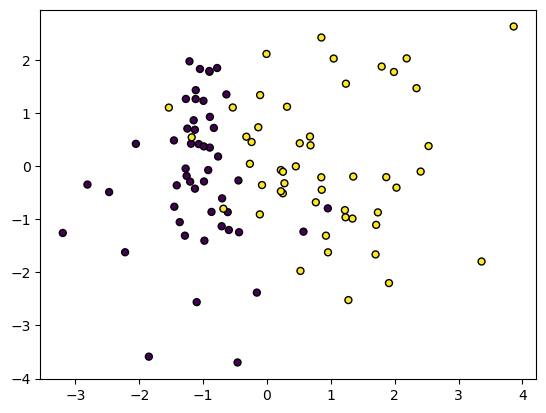

In [36]:
# visualization of the training examples
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x_train[:, 0], x_train[:, 1], marker="o", c=y_train, s=25, edgecolor="k")
plt.show()

### Q1. KNN Classifier

In [37]:
# KNN classifier
def knn(x, y, k):
    '''
    Inputs:
    - x: A ndarray of shape (N, D) containing training data; there are N
      training samples each of dimension D.
    - k: the number of nearest neighbors.
    - y: testing label data or training label data 
    '''
    y_pred = []
    for index in x:
      # Calculate distances between x and all examples in the training set
      distances = np.sqrt(np.sum((x-index) ** 2, axis=1)) 
      # Exclude the distance to x itself by setting it to a large value
      distances[distances == 0] = np.inf
      # Get indices of the K nearest neighbors
      nearest_neighbor_indices = np.argsort(distances)[:k]
      # Get the labels of the K nearest neighbors
      nearest_neighbor_labels = [y[i] for i in nearest_neighbor_indices]
      # Predict the class label by taking the majority vote
      predicted_label = np.argmax(np.bincount(nearest_neighbor_labels))
      y_pred.append(predicted_label)
    return np.array(y_pred)







In [38]:
knn(x_test, y_test, k = 5)

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [39]:
#define a accuracy function to calculate the total accuracy rate
def accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    scores = correct / total
    return scores 

In [40]:
#calculate the training accuracy 

y_train_pred = knn(x_train, y_train, k = 5)

print ('accuracy for training data: %f' %(accuracy(y_train, y_train_pred)))

accuracy for training data: 0.930000


In [41]:
#calculate the testing accuracy

y_test_pred = knn(x_test, y_test, k = 5)
print ('accuracy for testing data: %f' %(accuracy(y_test, y_test_pred)))

accuracy for testing data: 0.600000


### Q2. Linear Classifier
#### a. Complete the implementation of the LinearClassifier class.

In [42]:
# define the LinearClassifier class
class LinearClassifier:
    """An abstarct class for the linear classifiers"""
    def __init__(self, input_dim=2, output_dim=1):
        random.seed(0)
        np.random.seed(0)
        self.W = None
        self.b = None
        self.input_dim = input_dim
        self.output_dim = output_dim
    
    def param_init(self, W=None, b=None):
        if W is not None and W.shape == (self.input_dim, ):
            self.W = W
        else:
            self.W = np.random.randn(self.input_dim)
            
        if b is not None and b.shape == (self.output_dim, ):
            self.b = b
        else:
            self.b = np.random.randn(self.output_dim)
    
    def predict(self, x):

        if self.W is None or self.b is None:
            self.param_init()
        else: 
            scores = np.dot(x,self.W) + self.b
            self.logits = scores
        
            # return np.argmax(scores, axis =1)
            return scores

#### b. Complete the implementation of the cross entropy loss.

In [43]:
def binary_cross_entropy(y_true, y_pred_prob):
    # Ensure that predicted probabilities are within [epsilon, 1 - epsilon] to avoid log(0) issues
    epsilon = 1e-15
    y_pred_prob = np.clip(y_pred_prob, epsilon, 1 - epsilon)
    
    # Calculate binary cross-entropy loss
    loss = -np.mean(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))
    
    return loss

In [44]:
def cross_entropy_loss(y_pred, y_target):
    
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    # Compute the cross-entropy loss
    loss = -np.sum(y_target * np.log(y_pred)) / len(y_target)
    return loss


    # TODO:
    # Implement the cross entropy loss of SVM
    # Store the average loss value in a variable named 'loss'.
    ##########################
    # Your Code #
    ##########################
    # Replace "pass" statement with your code
     # Ensure numerical stability by adding a small epsilon value

#### c. Complete the implementation of the svm hinge loss.

In [45]:
def svm_loss(y_pred, y_target):

    
    loss = 1 - y_target * y_pred
    # Apply the hinge loss function
    loss = np.maximum(0, loss)
    # Calculate the average loss
    avg_loss = np.mean(loss)
    return avg_loss
    
    
    # TODO:
    # Implement the hinge loss of SVM.
    # Store the average loss value in a variable named 'loss'.
    ##########################
    # Your Code #
    ##########################
    # Replace "pass" statement with your code
    # Compute the loss for each data point

In [46]:
x_train.shape[-1]

2

#### d. Try different groups of weight & bias. 

In [47]:
# define a LinearClassifier object
Linear_Classifier = LinearClassifier(input_dim=x_train.shape[1], output_dim=1)
weights_1 = np.array([0.5,0.2])
bias_1 = np.array([0.1])
Linear_Classifier.param_init(weights_1, bias_1)


y_pred_1 = Linear_Classifier.predict(x_test)
print(y_pred_1)





# TODO: 
# Use the method 'LinearClassifier.param_init()' in utils to parameterize the linear classifier with a group of weight & bias. 
# Use the method 'LinearClassifier.predict()' in utils to get the predicted labels of test examples from the linear classifier. Store the predicted labels in a variable named 'y_pred'.
##########################
# Your Code #
##########################

[-1.23511043 -1.96964444 -0.46842408 -0.60416873 -1.31360098  0.59386865
 -1.00609508  0.60382567  0.74159737  1.05999753]


In [48]:
# TODO:
# Try different groups of weight & bias to parameterize the linear classifier and espectively get their predictions of test examples.
# Which group is the best? The answer should be based on different evaluation metrics, i.e. cross entropy loss and svm loss. #
# Use the method 'LinearClassifier.predict()' to get the predictions. #
# Use the methods 'cross_entropy_loss()' and 'svm_loss()'. Calculate the loss between the predictions and the targets
##########################
# Your Code #
##########################



#use the first group of parameters

print(cross_entropy_loss(y_pred_1, y_test))
print(svm_loss(y_pred_1, y_test))

10.412079893835388
1.2147843833838174


In [49]:
print(binary_cross_entropy(y_test, y_pred_1))

10.637511389471019


In [50]:
#another group of parameter
weights_2 = np.array([-1.9,1.1])
bias_2 = np.array([0.1])
Linear_Classifier.param_init(weights_2, bias_2)


y_pred_2 = Linear_Classifier.predict(x_test)
print(y_pred_2)
print("************************")

print(cross_entropy_loss(y_pred_2, y_test))
print(svm_loss(y_pred_2, y_test))
print(binary_cross_entropy(y_test, y_pred_2))

[-0.14546655  9.28332123  4.18667635 -0.96043654  8.25256725 -3.90921658
  1.46999661 -0.78907228 -2.76480042 -0.34741689]
************************
6.907755278982137
0.8136489172256016
10.361712878216224


In [51]:
weights_3 = np.array([2.1,0.9])
bias_3 = np.array([-0.2])
Linear_Classifier.param_init(weights_3, bias_3)


y_pred_3 = Linear_Classifier.predict(x_test)
print(y_pred_3)


print("************************")

print(cross_entropy_loss(y_pred_3, y_test))
print(svm_loss(y_pred_3, y_test))

[-5.97904078 -8.84996881 -2.52523068 -3.27803376 -6.0474182   1.80545749
 -4.93699175  1.94914733  2.48094344  3.93523392]
************************
10.361632918473205
2.542261768608124


In [52]:
print(binary_cross_entropy(y_test, y_pred_3))

17.26954811694138
